# MSc Thesis - Hugo Stam

##### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

#### Example 1 - Traditional onshore terminal development

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

#### notes:


In [1]:
import numpy as np
import pandas as pd
import statistics as st

import matplotlib.pyplot as plt
import matplotlib as mpl

from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system

# packages related to time, space and id
import datetime, time
import platform

# you need these dependencies packages related to the simulation
import simpy

# spatial libraries 
import shapely.geometry
from simplekml import Kml, Style

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# packages for data handling
import numpy as np
import pandas as pd
import statistics as st

# OpenCLSim package
import openclsim.core as core
import openclsim.model as model
import openclsim.plot as plot

# Additional import to save the initialization of the simulation
import openclsim.savesim as savesim

# Pretty-print a Python object to a stream
from pprint import pprint

# Used for making the graph to visualize our problem
import networkx as nx

# Dashboard
import panel as pn

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 15

## 0.1 Generate demand forecast scenario

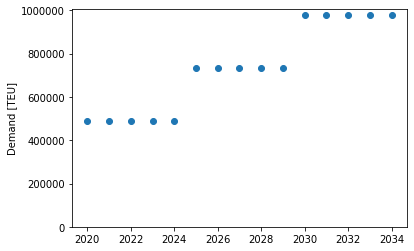

In [3]:
years = list(range(startyear, startyear + lifecycle))
%store -r total_ocean_transport

demand = []
for year in years:
    if year < 2025:
        demand.append(total_ocean_transport)
    elif year < 2030:
        demand.append(total_ocean_transport * 1.5)
    else:
        demand.append(total_ocean_transport * 2.0)

scenario_data={'year': years, 'volume': demand}

plt.plot(years, demand, 'o')
plt.ylabel('Demand [TEU]')
plt.ylim(0,)

# instantiate Commodity objects, the inputs for the Commodity class
container_defaults.container_data['fully_cellular_perc'] = 0
container_defaults.container_data['panamax_perc'] = 0
container_defaults.container_data['panamax_max_perc'] = 0
container_defaults.container_data['post_panamax_I_perc'] = 0
container_defaults.container_data['post_panamax_II_perc'] = 50
container_defaults.container_data['new_panamax_perc'] = 50
container_defaults.container_data['VLCS_perc'] = 0
container_defaults.container_data['ULCS_perc'] = 0
# print(container_defaults.container_data)

# ladens
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)
# print(container.scenario_data)

# combine
demand = [container]

## 0.2 Generate vessels

In [4]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

Specify the variables

In [5]:
Terminal = container_system.System(startyear = startyear,
                                   lifecycle = lifecycle,
                                   stack_equipment='rs',
                                   laden_stack='rs',
                                   crane_type_defaults=container_defaults.sts_crane_data,
                                   allowable_berth_occupancy = 0.60,
                                   transhipment_ratio = 0.20,
                                   elements = demand + vessels,
                                   laden_perc = 0.80, 
                                   reefer_perc = 0.10, 
                                   empty_perc = 0.05, 
                                   oog_perc = 0.05,
                                   operational_hours = 8640,     # 360 days 
                                   debug=True)                   # provide intermediate outputs via print statements

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity (see 0.1 Demand forecast scenario)
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, revenues)
    7. calculate PV's and aggregate to NPV

In [6]:
Terminal.simulate()


Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 49
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 29
  New Panamax calls: 20
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 490000.0
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online  (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online  (@ start of year): inf

  *** add Berth to elements
     Berth occupancy planned (after adding Berth): inf
     Berth occupancy online  (after adding Berth): inf

  *** add Quay to elements
     Berth occupancy planned (after adding Quay): inf
     Berth occupancy online  (after adding Quay): inf

  *** add STS crane to e

c:\checkouts\opentisim\opentisim\container_system.py:1510: FutureWarning:

`item` has been deprecated and will be removed in a future version

c:\checkouts\opentisim\opentisim\container_system.py:1996: FutureWarning:

`item` has been deprecated and will be removed in a future version

c:\checkouts\opentisim\opentisim\container_system.py:1557: FutureWarning:

`item` has been deprecated and will be removed in a future version



     Empty Handlers online (@ start of year): 0

  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements
  *** add Tractor to elements

Below, the various investment decisions are evaluated for the year 2021.

Simulate year: 2021
  Total vessel calls: 49
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 29
  New Panamax calls: 20
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 490000.0
     a total of 1 Berth is online; 1 total planned
     a total of 0 Quay is online; 1 total planned
     a total of 0 STS_crane is online; 2 total planned

  Start analysis:
   > Total time at berth (planned) is 4862.0 h / 8640 oh
     Berth occupancy planned (@ start of year): 0.563
     Berth occupancy online  (@ star


  *** add STS crane to elements
   > Total time at berth (planned) is 4979.0 h / 8640 oh
   > Total time at berth (online) is 7334.0 h / 8640 oh
     Berth occupancy planned (after adding Crane): 0.576
     Berth occupancy online  (after adding Crane): 0.849

   > Quay capacity planned 274752.0 TEU per year
   > Quay capacity planned 549504.0 TEU per year
   > Quay capacity planned 824256.0 TEU per year
   > Throughput online 549504.0 TEU per year
     Horizontal Transport online (@ start of year): 10
     Number of STS cranes        (@ start of year): 2

     Stack Capacity planned  (@ start of year): 7680
     Stack Capacity online   (@ start of year): 7680
     Stack Capacity required (@ start of year): 11389
     Total Laden and Reefer Ground Slots required (@ start of year): 2847

  *** add Laden Stack to elements
  *** add Laden Stack to elements
  *** add Laden Stack to elements
  *** add Laden Stack to elements
  *** add Laden Stack to elements
  *** add Laden Stack to element


Below, the various investment decisions are evaluated for the year 2031.

Simulate year: 2031
  Total vessel calls: 98
  Fully cellular calls: 0
  Panamax calls: 0
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 58
  New Panamax calls: 40
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 980000.0
     a total of 1 Berth is online; 1 total planned
     a total of 1 Quay is online; 1 total planned
     a total of 4 STS_crane is online; 4 total planned

  Start analysis:
   > Total time at berth (planned) is 5040.0 h / 8640 oh
   > Total time at berth (online) is 5040.0 h / 8640 oh
     Berth occupancy planned (@ start of year): 0.583
     Berth occupancy online  (@ start of year): 0.583
     Crane occupancy planned (@ start of year): 0.542
     Crane occupancy online  (@ start of year): 0.542

   > Quay capacity planned 274752.0 TEU per year
   > Quay capacity planned 549504.0 TEU per year
   > Quay capacity planned 824256.0 TEU per year
   > Quay capacity 

PV: [-2.43346770e+07 -1.07266653e+08 -1.41211039e+07 -1.24339830e+07
 -1.09484312e+07 -2.97565869e+07 -1.28245549e+07 -1.12923394e+07
 -9.94318561e+06 -8.75522214e+06 -1.84198920e+07 -8.75953155e+06
 -7.71298531e+06 -6.79147532e+06 -5.98006287e+06]
NPV: -289340684.5197389


## 3. Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__) # This is the dictionary containing the module's symbol table. 
        # object.__dict__ A dictionary or other mapping object used to store an object's (writable) attributes.


Laden

{'historic_data': [], 'scenario_data':     year    volume
0   2020  490000.0
1   2021  490000.0
2   2022  490000.0
3   2023  490000.0
4   2024  490000.0
5   2025  735000.0
6   2026  735000.0
7   2027  735000.0
8   2028  735000.0
9   2029  735000.0
10  2030  980000.0
11  2031  980000.0
12  2032  980000.0
13  2033  980000.0
14  2034  980000.0, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 0, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 50, 'new_panamax_perc': 50, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': '9f29f43e-f021-11e9-a822-04d3b0b539c4'}

Fully_Cellular_1

{'type': 'Fully_Cellular', 'call_size': 2500, 'LOA': 215, 'draught': 10.0, 'beam': 20.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'starting_fee': 30, 'variable_fee': 0.045, 'avg_overseas_distance': 3000, 'name': 'Fully_Cellular_1', 'id': '9f3a75ac-f021-11e9-9c01-04d3b0b539c4'}

Panamax_1

{'type': 'Panamax', 'call_size': 3400,

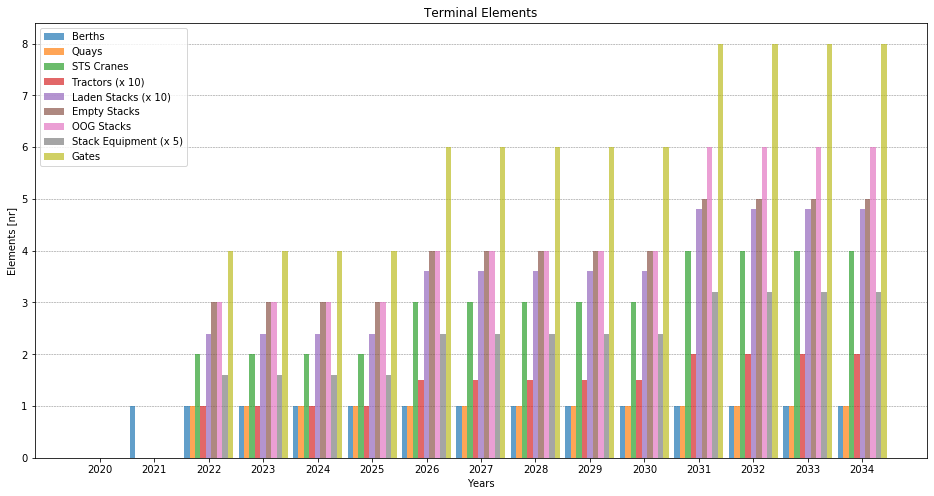

In [8]:
Terminal.terminal_elements_plot()

   > Total time at berth (planned) is 2520.0 h / 8640 oh
   > Total time at berth (planned) is 2520.0 h / 8640 oh
   > Total time at berth (planned) is 2520.0 h / 8640 oh
   > Total time at berth (online) is 4862.0 h / 8640 oh
   > Total time at berth (planned) is 2520.0 h / 8640 oh
   > Total time at berth (online) is 4862.0 h / 8640 oh
   > Total time at berth (planned) is 2520.0 h / 8640 oh
   > Total time at berth (online) is 4862.0 h / 8640 oh
   > Total time at berth (planned) is 3801.0 h / 8640 oh
   > Total time at berth (online) is 7334.0 h / 8640 oh
   > Total time at berth (planned) is 3801.0 h / 8640 oh
   > Total time at berth (online) is 4979.0 h / 8640 oh
   > Total time at berth (planned) is 3801.0 h / 8640 oh
   > Total time at berth (online) is 4979.0 h / 8640 oh
   > Total time at berth (planned) is 3801.0 h / 8640 oh
   > Total time at berth (online) is 4979.0 h / 8640 oh
   > Total time at berth (planned) is 3801.0 h / 8640 oh
   > Total time at berth (online) is 4

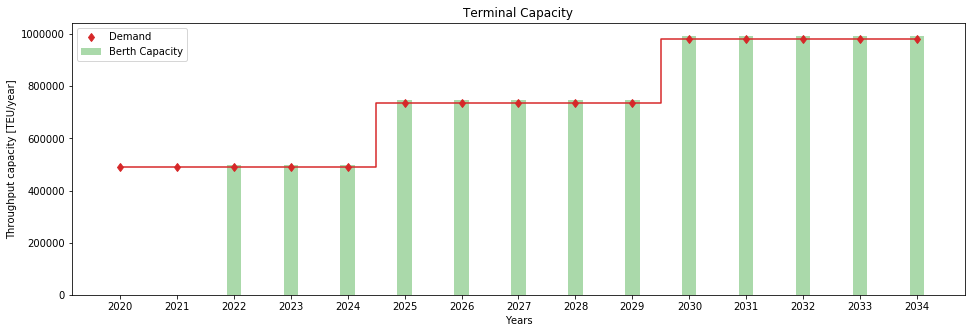

In [9]:
Terminal.terminal_capacity_plot()

    Year  Land use (ha)
0   2020        0.00000
1   2021        0.00000
2   2022       17.75216
3   2023       17.75216
4   2024       17.75216
5   2025       17.75216
6   2026       24.35711
7   2027       24.35711
8   2028       24.35711
9   2029       24.35711
10  2030       24.35711
11  2031       31.63406
12  2032       31.63406
13  2033       31.63406
14  2034       31.63406


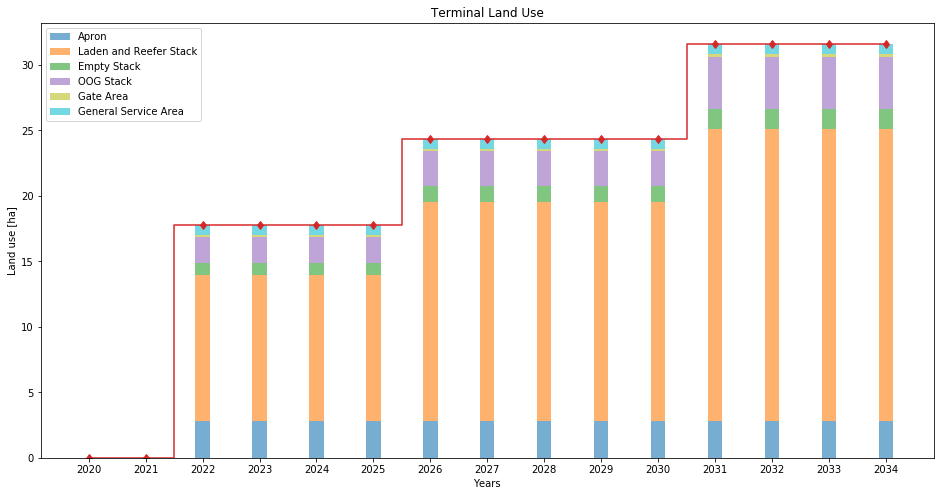

In [10]:
Terminal.land_use_plot()

    Year  Storage Area
0   2020          0.00
1   2021          0.00
2   2022         58.08
3   2023         58.08
4   2024         58.08
5   2025         58.08
6   2026         83.20
7   2027         83.20
8   2028         83.20
9   2029         83.20
10  2030         83.20
11  2031        114.72
12  2032        114.72
13  2033        114.72
14  2034        114.72


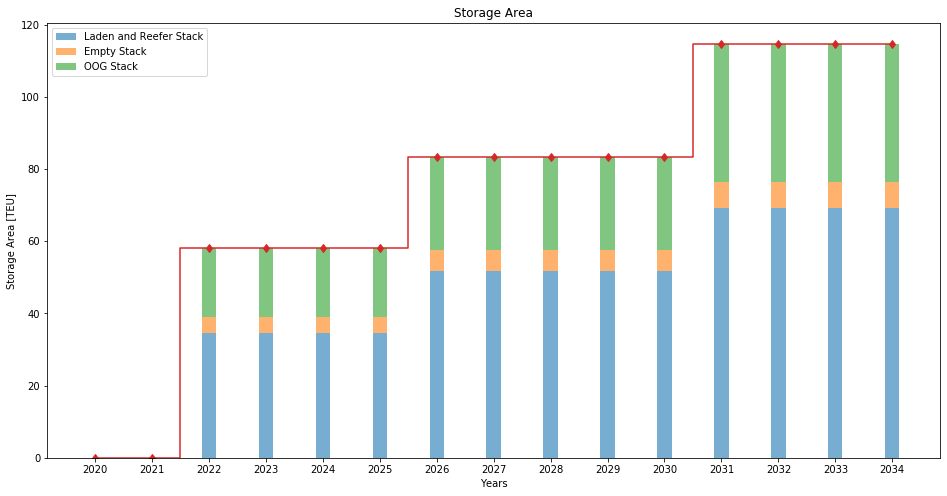

In [11]:
Terminal.storage_area_plot()

#### Add cash flow information for each of the terminal elements.

In [12]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

    Year        Capex  Maintenance  Insurance       Energy        Labour  \
0   2020   24334677.0          0.0          0        0.000           NaN   
1   2021  121821266.0          0.0          0        0.000           NaN   
2   2022          0.0    5347596.7          0  1700185.130  9.630769e+06   
3   2023          0.0    5347596.7          0  1700185.130  9.630769e+06   
4   2024          0.0    5347596.7          0  1700185.130  9.630769e+06   
5   2025   34907374.0    5347596.7          0  2550281.095  1.111077e+07   
6   2026          0.0    7478096.7          0  2550281.095  1.518615e+07   
7   2027          0.0    7478096.7          0  2550281.095  1.518615e+07   
8   2028          0.0    7478096.7          0  2550281.095  1.518615e+07   
9   2029          0.0    7478096.7          0  2550281.095  1.518615e+07   
10  2030   36612374.0    7478096.7          0  3400372.980  1.518615e+07   
11  2031          0.0    9776596.7          0  3400372.980  1.926154e+07   
12  2032    

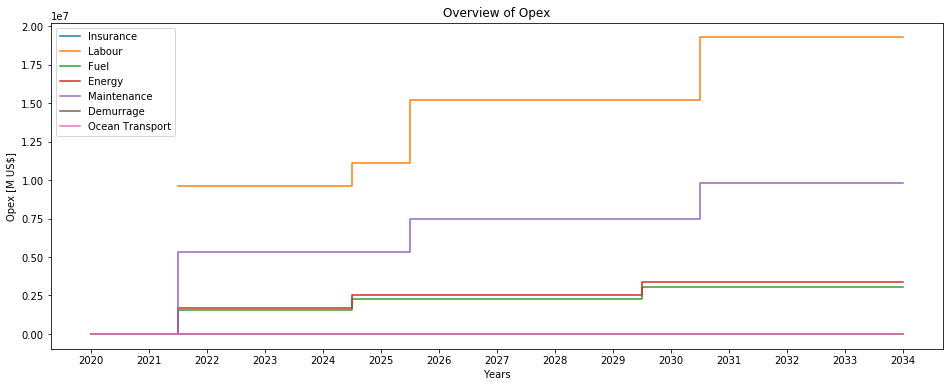

In [13]:
Terminal.opex_plot(cash_flows)

Cash Flow Plot


c:\checkouts\opentisim\opentisim\container_system.py:2527: FutureWarning:

`item` has been deprecated and will be removed in a future version



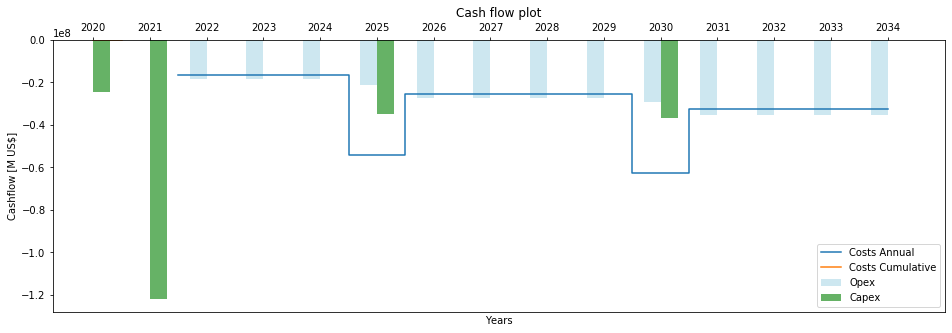

In [14]:
print('\033[1mCash Flow Plot\033[0m')
Terminal.cashflow_plot(cash_flows)

Cash Flow Plot - Weighted average cost of capital


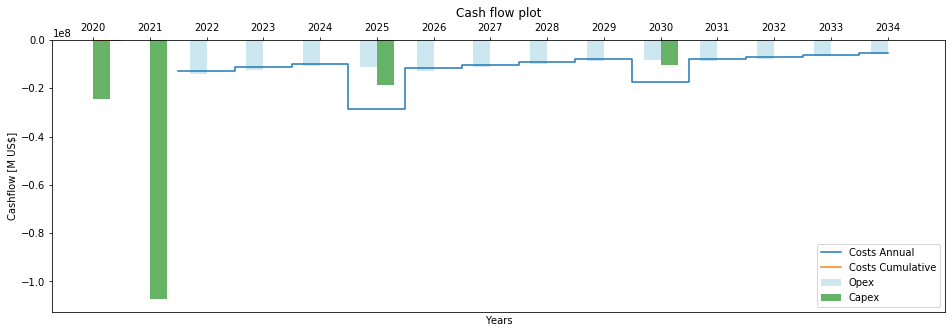

In [15]:
print('\033[1mCash Flow Plot - Weighted average cost of capital\033[0m')
Terminal.cashflow_plot(cash_flows_WACC_real)

In [16]:
Terminal.NPV()

PV: [-2.43346770e+07 -1.07266653e+08 -1.41211039e+07 -1.24339830e+07
 -1.09484312e+07 -2.97565869e+07 -1.28245549e+07 -1.12923394e+07
 -9.94318561e+06 -8.75522214e+06 -1.84198920e+07 -8.75953155e+06
 -7.71298531e+06 -6.79147532e+06 -5.98006287e+06]
NPV: -289340684.5197389


In [17]:
NPV = 285,898,154
occupancy = 0.539